In [34]:
# Importing dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import seaborn as sns



In [35]:
airline_data = pd.read_csv("/Users/ismailellahi/Desktop/BootCamp/Project1.Gr10/Project Data/Data.csv")
airline_data.head()

,Unnamed: 0,ORIGIN_AIRPORT_ID,Description,Code.y,Unnamed: 0_x,OP_UNIQUE_CARRIER,airline_name,Unnamed: 0_y,YEAR,MONTH,...,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,0,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,236754,2018,1,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,237277,2018,1,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,237781,2018,1,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,3,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,759132,2018,3,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,759644,2018,3,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [36]:
print(airline_data.dtypes)
airline_data.shape


Unnamed: 0               int64
ORIGIN_AIRPORT_ID      float64
Description             object
Code.y                  object
Unnamed: 0_x             int64
OP_UNIQUE_CARRIER       object
airline_name            object
Unnamed: 0_y             int64
YEAR                     int64
MONTH                    int64
FL_DATE                 object
OP_CARRIER_FL_NUM        int64
DEST_AIRPORT_ID          int64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED                int64
CANCELLATION_CODE       object
DIVERTED                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object


(2359976, 29)

In [37]:
null_counts = airline_data.isnull().sum()
print(null_counts)


Unnamed: 0                   0
ORIGIN_AIRPORT_ID            0
Description                  0
Code.y                       0
Unnamed: 0_x                 0
OP_UNIQUE_CARRIER            0
airline_name                 0
Unnamed: 0_y                 0
YEAR                         0
MONTH                        0
FL_DATE                      0
OP_CARRIER_FL_NUM            0
DEST_AIRPORT_ID              0
DEP_DELAY                45474
DEP_DELAY_NEW            45474
DEP_DEL15                45474
DEP_DELAY_GROUP          45474
ARR_DELAY                51526
ARR_DELAY_NEW            51526
ARR_DEL15                51526
ARR_DELAY_GROUP          51526
CANCELLED                    0
CANCELLATION_CODE      2313116
DIVERTED                     0
CARRIER_DELAY          1916035
WEATHER_DELAY          1916035
NAS_DELAY              1916035
SECURITY_DELAY         1916035
LATE_AIRCRAFT_DELAY    1916035
dtype: int64


In [44]:
subset_data = ["ORIGIN_AIRPORT_ID", "Description", "Code.y",  "OP_UNIQUE_CARRIER",
               "airline_name", "YEAR", "MONTH", "FL_DATE", "OP_CARRIER_FL_NUM",
               "DEST_AIRPORT_ID", "DEP_DELAY","ARR_DELAY", "CANCELLED", "DIVERTED"]

subset_data = airline_data.loc[:, subset_data]

null_counts = subset_data.isnull().sum()
print(null_counts)
# Assuming your DataFrame is named "airline_data"


ORIGIN_AIRPORT_ID        0
Description              0
Code.y                   0
OP_UNIQUE_CARRIER        0
airline_name             0
YEAR                     0
MONTH                    0
FL_DATE                  0
OP_CARRIER_FL_NUM        0
DEST_AIRPORT_ID          0
DEP_DELAY            45474
ARR_DELAY            51526
CANCELLED                0
DIVERTED                 0
dtype: int64


In [50]:
# Assuming your DataFrame is named "airline_data"
max_cancelled = airline_data['CANCELLED'].max()
min_cancelled = airline_data['CANCELLED'].min()
max_diverted = airline_data['DIVERTED'].max()
min_diverted = airline_data['DIVERTED'].min()

print("Max CANCELLED:", max_cancelled)
print("Min CANCELLED:", min_cancelled)
print("Max DIVERTED:", max_diverted)
print("Min DIVERTED:", min_diverted)

Max CANCELLED: 1
Min CANCELLED: 0
Max DIVERTED: 1
Min DIVERTED: 0


In [49]:
# Assuming your DataFrame is named "airline_data"
cancelled_count = airline_data['CANCELLED'].value_counts().get(1, 0)

diverted_count = airline_data['DIVERTED'].value_counts().get(1, 0)

print("Number of rows = 1:", cancelled_count)
print("Number of rows = 1:", diverted_count)

Number of rows = 1: 46860
Number of rows = 1: 4667


In [121]:
# # Take a sample of the dataset
# sample_df = merged_df.sample(n=1000)  # Specify the desired sample size (e.g., 1000 rows)
# sample_df.head()
sample_df = merged_df


In [122]:
#fill missing values with 0 
sample_df.fillna(0, inplace=True)
sample_df.head()


,ORIGIN_AIRPORT_ID,Description,Code.y,Unnamed: 0_x,OP_UNIQUE_CARRIER,airline_name,Unnamed: 0_y,YEAR,MONTH,FL_DATE,...,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,236754,2018,1,1/1/18 00:00,...,0.0,-1,0,0,0,0.0,0.0,0.0,0.0,0.0
1,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,237277,2018,1,1/2/18 00:00,...,0.0,-1,0,0,0,0.0,0.0,0.0,0.0,0.0
2,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,237781,2018,1,1/3/18 00:00,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,759132,2018,3,3/26/18 00:00,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,759644,2018,3,3/27/18 00:00,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [123]:
sample_df.columns


Index(['ORIGIN_AIRPORT_ID', 'Description', 'Code.y', 'Unnamed: 0_x',
       'OP_UNIQUE_CARRIER', 'airline_name', 'Unnamed: 0_y', 'YEAR', 'MONTH',
       'FL_DATE', 'OP_CARRIER_FL_NUM', 'DEST_AIRPORT_ID', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [125]:
# Calculate on-time percentages by airline and date
on_time_percentage = sample_df.groupby(['airline_name','DATE'])['ARR_DELAY'].apply(lambda x: (x <= 0).mean() * 100).reset_index(name='On-Time Percentage')

# Calculate average on-time percentage for each airline
average_on_time_percentage = on_time_percentage.groupby('airline_name')['On-Time Percentage'].mean().reset_index().sort_values('On-Time Percentage', ascending=False)

# Select top airlines with highest on-time performance
top_airlines = average_on_time_percentage.nlargest(5, 'On-Time Percentage')['airline_name']

# Filter on-time percentage data for top airlines
top_airlines_on_time = on_time_percentage[on_time_percentage['airline_name'].isin(top_airlines)]

# Plot on-time performance over time for top airlines
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_airlines_on_time, x='DATE', y='On-Time Percentage', hue='airline_name', palette='Set2')
plt.xlabel('Time')
plt.ylabel('On-Time Percentage')
plt.title('On-Time Performance of Top Airlines over Time')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


ValueError: Could not interpret value `DATE` for parameter `x`

<Figure size 1200x800 with 0 Axes>

Airlines with the highest on-time performance:
airline_name
Delta       79.661017
Hawaiian    76.000000
JetBlue     75.000000
United      75.000000
Alaska      73.076923
dtype: float64


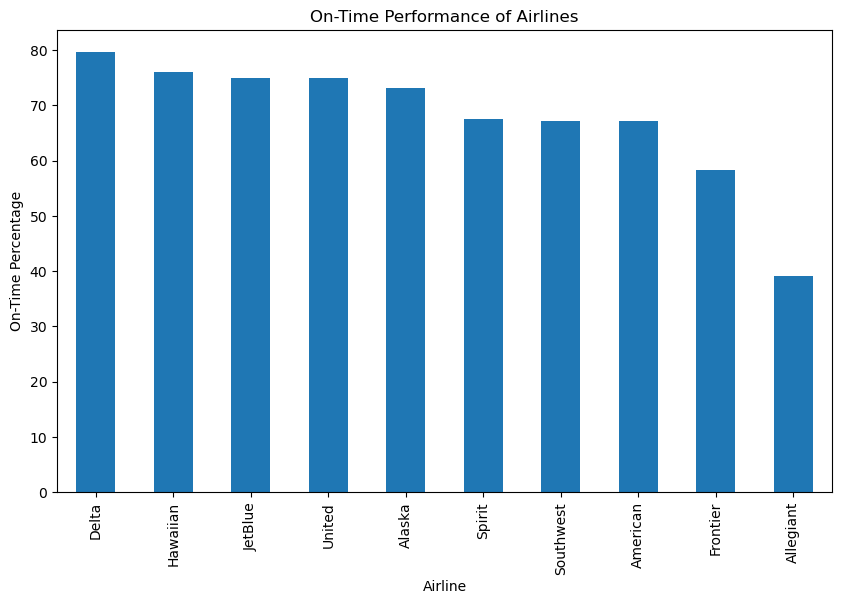

In [83]:

# Calculate the total number of flights for each airline
total_flights = sample_df.groupby('airline_name').size()

# Calculate the number of on-time flights for each airline
on_time_flights = sample_df[sample_df['ARR_DELAY'] <= 0].groupby('airline_name').size()

# Calculate the percentage of on-time flights for each airline
on_time_percentage = (on_time_flights / total_flights) * 100

# Sort the airlines based on the on-time percentage in descending order
sorted_airlines = on_time_percentage.sort_values(ascending=False)

# Print the airlines with the highest on-time performance
print("Airlines with the highest on-time performance:")
print(sorted_airlines.head())

# Visualize the on-time performance using a bar plot
plt.figure(figsize=(10, 6))
sorted_airlines.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('On-Time Percentage')
plt.title('On-Time Performance of Airlines')
plt.show()

In [70]:
num_airlines = len(sample_df['airline_name'].unique())
num_airlines



10

In [ ]:
on_time_date = merged_df[["OP_UNIQUE_CARRIER","ARR_DEL15","YEAR","MONTH","DEP_DELAY"]]
on_time_date

,OP_UNIQUE_CARRIER,ARR_DEL15,YEAR,MONTH,DEP_DELAY
0,DL,1.0,2018,1,92.0
1,DL,0.0,2018,1,-4.0
2,DL,0.0,2018,1,-6.0
3,DL,0.0,2018,1,-3.0
4,DL,0.0,2018,1,9.0
...,...,...,...,...,...
19627377,AS,0.0,2022,7,-10.0
19627378,AS,0.0,2022,7,0.0
19627379,AS,0.0,2022,7,-10.0
19627380,G4,0.0,2018,1,15.0


In [ ]:
performance = on_time_date.groupby(["OP_UNIQUE_CARRIER","YEAR","MONTH"])

Routes with the Highest Average Delay:
      ORIGIN_AIRPORT_ID_origin  DEST_AIRPORT_ID  Average Delay  \
6613                     15624            14986          720.0   
4413                     13891            10800          675.0   
1437                     11252            11433          248.0   
1880                     11423            14108          155.0   
2992                     12451            15304          144.0   
628                      10599            14771          140.5   
3011                     12478            11193          132.0   
3507                     13029            13930          130.2   
6335                     15070            14027          122.0   
4592                     13933            14027          118.0   

                                         Origin_Airport Origin_Airport_Code  \
6613  Valparaiso, FL: Eglin AFB Destin Fort Walton B...                 VPS   
4413                 Ontario, CA: Ontario International                 ONT 

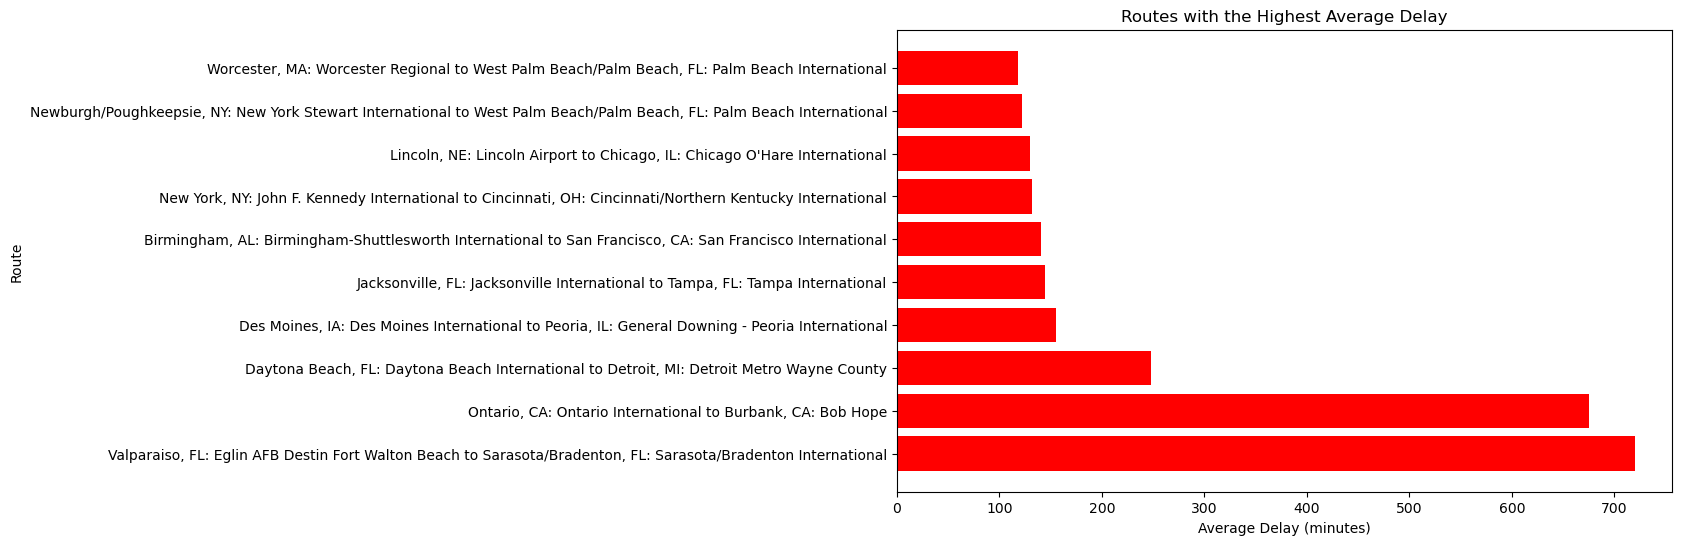

Airlines with the Highest Average Delay:
  airline_name  Average Delay
6      JetBlue      15.670631
4     Frontier      13.410059
1    Allegiant      12.405191
2     American      10.396171
8       Spirit      10.142911
9       United      10.107331
7    Southwest       9.947426
3        Delta       6.891475
0       Alaska       3.333871
5     Hawaiian       1.471385


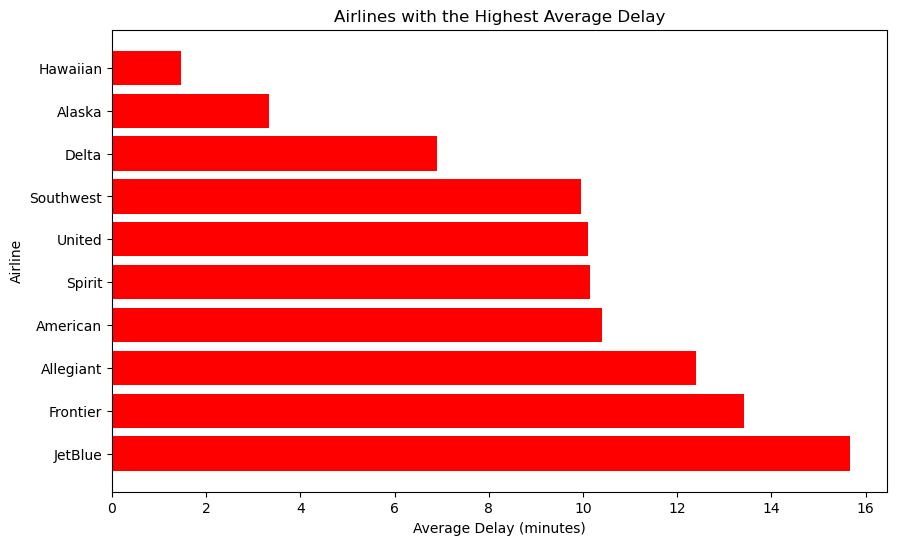

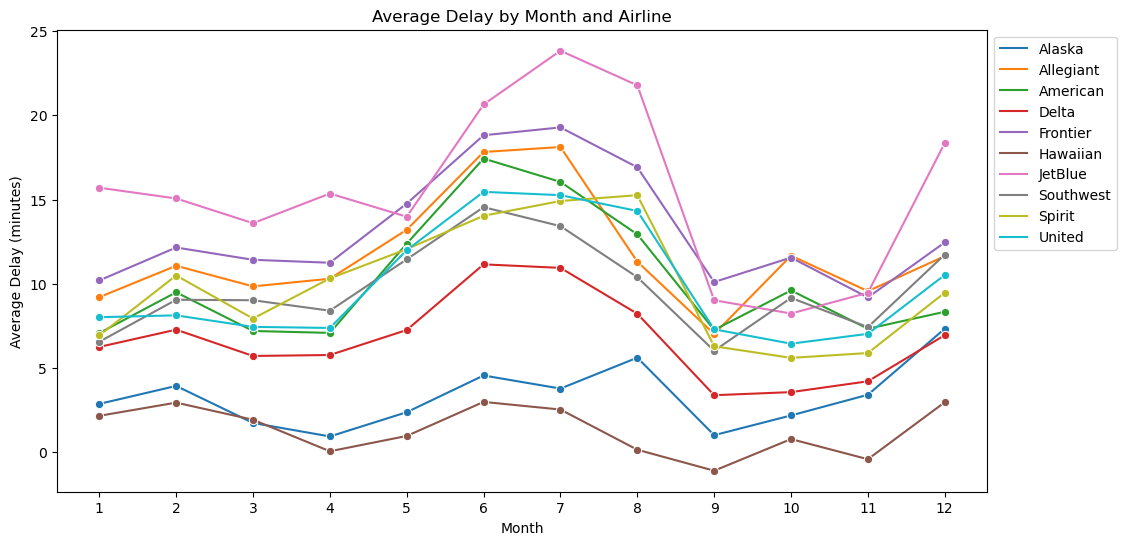

In [105]:
# Calculate average delay by route using airport IDs
route_delay = merged_df.groupby(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'])['DEP_DELAY'].mean().reset_index(name='Average Delay')

# Merge with airport_info for origin airport names
route_delay = pd.merge(route_delay, airport_info, left_on='ORIGIN_AIRPORT_ID', right_on='ORIGIN_AIRPORT_ID', how='left')
# Rename columns for origin airport
route_delay.rename(columns={'Description': 'Origin_Airport', 'Code.y': 'Origin_Airport_Code'}, inplace=True)

# Merge with airport_info for destination airport names
route_delay = pd.merge(route_delay, airport_info, left_on='DEST_AIRPORT_ID', right_on='ORIGIN_AIRPORT_ID', how='left', suffixes=('_origin', '_destination'))
# Rename columns for destination airport
route_delay.rename(columns={'Description': 'Destination_Airport', 'Code.y': 'Destination_Airport_Code'}, inplace=True)

# Sort by average delay in descending order
route_delay = route_delay.sort_values('Average Delay', ascending=False)

# Print the routes with the highest average delay
print("Routes with the Highest Average Delay:")
print(route_delay.head(10))

# Select the top 10 routes with the highest average delay
top_routes = route_delay.head(10)

# Create a bar plot for routes with the highest average delay
plt.figure(figsize=(10, 6))
plt.barh(top_routes['Origin_Airport'] + ' to ' + top_routes['Destination_Airport'], top_routes['Average Delay'], color='red')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')
plt.title('Routes with the Highest Average Delay')
plt.show()

# Calculate average delay by airline
airline_delay = merged_df.groupby('airline_name')['DEP_DELAY'].mean().reset_index(name='Average Delay')

# Sort by average delay in descending order
airline_delay = airline_delay.sort_values('Average Delay', ascending=False)

# Print the airlines with the highest average delay
print("Airlines with the Highest Average Delay:")
print(airline_delay.head(10))

# Create a bar plot for airlines with the highest average delay
plt.figure(figsize=(10, 6))
plt.barh(airline_delay['airline_name'], airline_delay['Average Delay'], color='red')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airline')
plt.title('Airlines with the Highest Average Delay')
plt.show()


# Calculate average delay by month and airline
monthly_delay = merged_df.groupby(['MONTH', 'airline_name'])['DEP_DELAY'].mean().reset_index(name='Average Delay')

# Create a line plot for average delay by month and airline
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_delay, x='MONTH', y='Average Delay', hue='airline_name', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Month and Airline')
plt.xticks(range(1, 13))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

